In [ ]:
import numpy as np
import pymc3 as pm
import pandas as pd 
import seaborn as sns
import scipy.stats as sts 
import matplotlib.pyplot as plt
import statistics
from math import gamma as fgamma #Função Gamma

#Exercicios Bayesiana

**Exercicio 1** 

In [ ]:
with open ("/content/dadosaula2.txt") as arquivo:
  dados = arquivo.read()
dados = dados.split()
numeros = [float(i) for i in dados]

In [ ]:
np.mean(numeros)

883.6865489999999

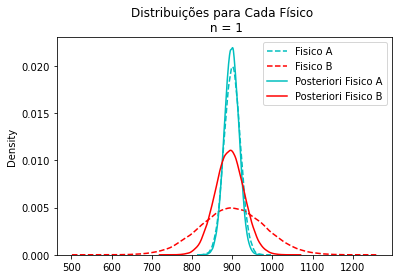

In [ ]:
fisico1 = [i for i in sts.norm.rvs(900,20,size = 100000)]
fisico2 = [i for i in sts.norm.rvs(900,80,size = 100000)]
fisico1_post = [i for i in sts.norm.rvs(898.4,17.9,size = 100000)]
fisico2_post = [i for i in sts.norm.rvs(893.6,35.77,size = 100000)]

fig, ax = plt.subplots(figsize = (6,4))
sns.kdeplot(fisico1,label = 'Fisico A',color='c',linestyle = '--')
sns.kdeplot(fisico2,label = "Fisico B",color = 'r',linestyle = '--')
sns.kdeplot(fisico1_post,label = "Posteriori Fisico A",color = 'c')
sns.kdeplot(fisico2_post,label = "Posteriori Fisico B",color = 'r')

plt.title("Distribuições para Cada Físico \n n = 1",fontsize = 12)
plt.legend()

Text(0.5, 1.0, 'Preditiva a posteriori após medição dos 100 dados')

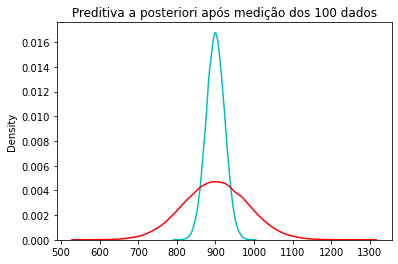

In [ ]:
fisico1_pred = [i for i in sts.norm.rvs(900,23.9,size = 100000)]
fisico2_pred = [i for i in sts.norm.rvs(900,84,size = 100000)]

fig, ax = plt.subplots(figsize= (6,4))
sns.kdeplot(fisico1_pred,label = "Preditiva Fisico A",color = 'c')
sns.kdeplot(fisico2_pred,label = "Preditiva Fisico B",color = 'r')

plt.title("Preditiva a posteriori após medição dos 100 dados")

In [ ]:
sts.norm.ppf(0.975,884.31,3.92)

891.993058819397

**Exercicio 2**

In [ ]:
theta = np.arange(0,10,0.001)
dados1 = []
for i in theta:
  dados1.append(sts.poisson.pmf(12, mu = i**2))

dados2 = []
for i in theta:
  dados2.append(sts.poisson.pmf(3, mu = i**2))

dados3 = []
for i in theta:
  dados3.append(sts.poisson.pmf(21,mu = i**2))



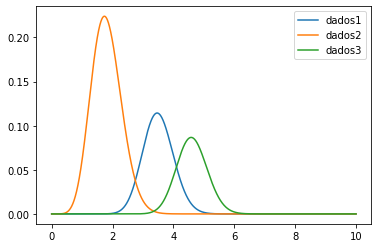

In [ ]:
sns.lineplot(x = theta,y = dados1,label = 'dados1')
sns.lineplot(x = theta,y = dados2,label = 'dados2')
sns.lineplot(x = theta,y = dados3,label = 'dados3')
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f8dc69aaa90> has a label of '_line0' which cannot be automatically added to the legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f8dc69aa3d0> has a label of '_line0' which cannot be automatically added to the legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f8dc6966390> has a label of '_line0' which cannot be automatically added to the legend.


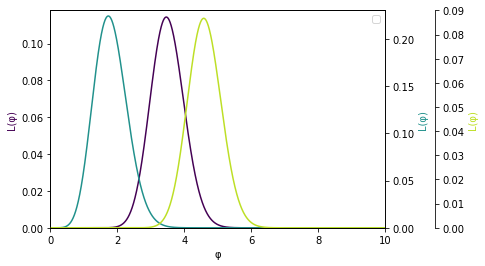

In [ ]:
fig, host = plt.subplots(figsize=(6,4)) # (width, height) in inches
# (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)
    
par1 = host.twinx()
par2 = host.twinx()
    
host.set_xlim(0, 10)
host.set_ylim(0, 0.118)
par1.set_ylim(0, 0.23)
par2.set_ylim(0, 0.09)
    
host.set_xlabel("φ")
host.set_ylabel("L(φ)")
par1.set_ylabel("L(φ)")
par2.set_ylabel("L(φ)")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(theta,dados1,color=color1)
p2, = par1.plot(theta,dados2,color=color2)
p3, = par2.plot(theta,dados3,color=color3)

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 50))

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

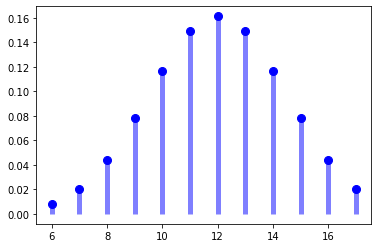

In [ ]:
fig, ax = plt.subplots(1, 1)
n,p = 24,0.5
x = np.arange(sts.binom.ppf(0.01, n, p),
              sts.binom.ppf(0.99, n, p))
ax.plot(x, sts.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, sts.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

#Testando distribuições

\begin{align}
X \sim Beta(\alpha , \beta)
\end{align}

Utilizando
``` 
beta.ppf(0.5,10,8)
```
calcula o valor de a tal que P(X < a) = 0.5


Ou seja o Quantil que resulta na probabilidade de 50%

Semelhante ao qbeta do R

In [ ]:
sts.beta.ppf(0.5,10,8)

0.5576576816186782


O comando beta.cdf(0.8,10,8) calcula o valor de b tal que P(X < 0,8) = b

Semelhante ao pbeta do R

In [ ]:
sts.beta.cdf(0.8,10,8)

0.9890656847659008

O comando beta.pdf(0.8,10,8) calcula o valor de x tal que P(X = 0.8)

In [ ]:
sts.beta.pdf(0.8,10,8)

0.3341140958904319

Gerando distribuições Gamma

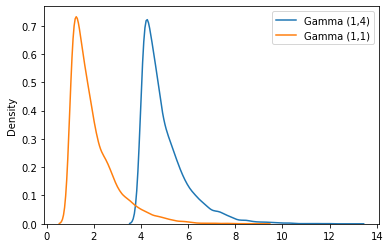

In [ ]:
gama1 = [i for i in sts.gamma.rvs(1,4,size = 10000)]
gama2 = [i for i in sts.gamma.rvs(1,1,size = 10000)]

sns.kdeplot(gama1,label = "Gamma (1,4)");
sns.kdeplot(gama2,label = "Gamma (1,1)");
plt.legend();

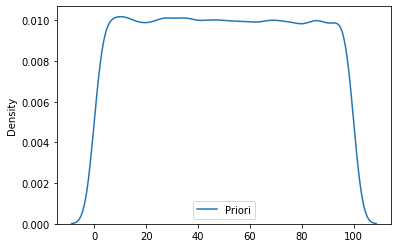

In [ ]:
priori = [i for i in sts.uniform.rvs(0,100,size = 100000)]

sns.kdeplot(priori,label = "Priori");
plt.legend();

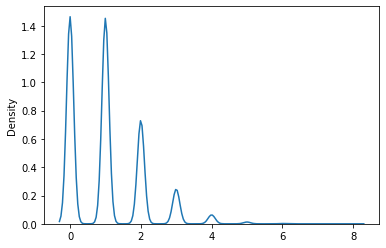

In [ ]:
verossi = [i for i in sts.poisson.rvs(1,size = 100000)]
sns.kdeplot(verossi,label = "Verossimilhança");

In [ ]:
y = [892]
with pm.Model() as model:
  mu = pm.Normal('mu',900,20)
  likelihood = pm.Normal('mu',900,80,observed = y)
  trace = pm.sample(500)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69acce7390>,
      dtype=object)

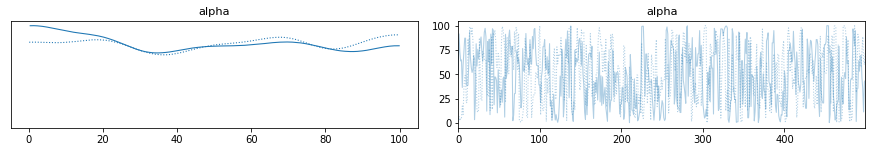

In [ ]:
pm.traceplot(trace)

#Regressão Linear com Inferência Bayesiana

**Exemplo 1**

Suponha que estamos interessados em estudar a relação linear entre X e Y por meio de uma  amostra de $n$ observações. Para isto, utilizamos o modelo

\begin{align}
y = \beta_0 + \beta_1 x + \epsilon
\end{align}

\begin{align}
\epsilon_i \sim N(0,\phi^{-1}),  i = 1,...,n
\end{align}


In [ ]:
#Vamos gerar dados ficticios
from math import sqrt
n = 50
phi_v = 2
beta0_v = 1.7
beta1_v = 0.19

x = sts.norm.rvs(1,1,size = n)
erro = sts.norm.rvs(0,sqrt(1/phi_v),size = n)

y = (beta0_v + (beta1_v*x) + erro)

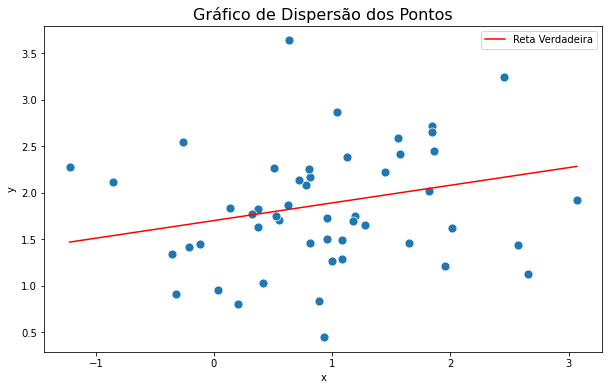

In [ ]:
plt.figure(figsize = (10,6))
plt.title("Gráfico de Dispersão dos Pontos",size = 16)
plt.xlabel('x')
plt.ylabel('y')
sns.scatterplot(x = x, y = y,s = 80)
sns.lineplot(x = x, y = beta0_v + (beta1_v*x),label = "Reta Verdadeira", color = 'red')
plt.legend()
plt.show()

###Fazendo Regressão de forma Clássica

In [ ]:
import statsmodels.api as sm

X2 = sm.add_constant(x)

regressao = sm.OLS(y,X2).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.156
Date:                Wed, 05 Jan 2022   Prob (F-statistic):              0.288
Time:                        07:47:40   Log-Likelihood:                -47.664
No. Observations:                  50   AIC:                             99.33
Df Residuals:                      48   BIC:                             103.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7221      0.131     13.114      0.0

###Utilizando PyMC3

[Documentação](https://docs.pymc.io/en/v3/pymc-examples/examples/generalized_linear_models/GLM-linear.html)

In [ ]:
from pymc3 import HalfCauchy, Model, Normal, glm, plot_posterior_predictive_glm, sample

with Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta = 10, testval = 1.0)
    intercept = Normal("Intercept", 0, sigma = 10)
    x_coeff = Normal("x", 0, sigma = 10)

    # Define likelihood
    likelihood = Normal("y", mu = intercept + x_coeff * x, sigma = sigma , observed = y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = sample(3000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [x, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 9 seconds.


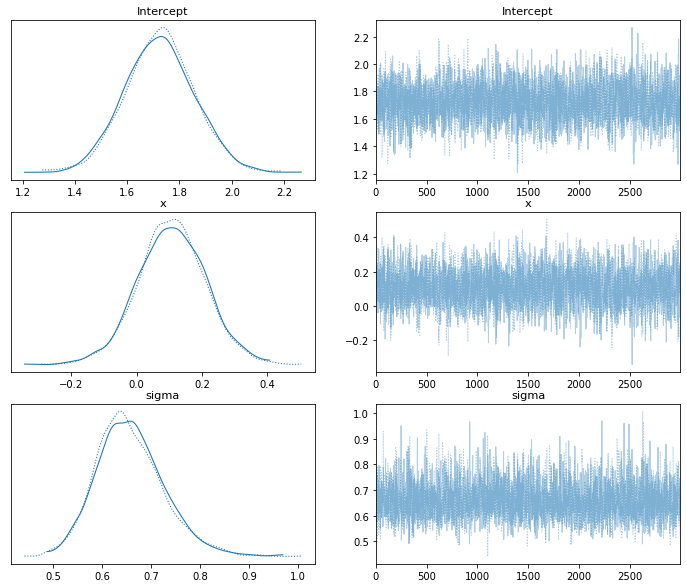

In [ ]:
import arviz as az
az.plot_trace(trace, figsize=(12, 10));

###Utilizando o Algoritmo Gibbs Sampling

\begin{align}
\beta_0 \sim N(0,K),  i = 1,...,n
\end{align}

\begin{align}
\beta_1 \sim N(0,K),  i = 1,...,n
\end{align}

\begin{align}
\phi \sim Gamma (a, b )
\end{align}

Obtenha uma amostra da distribuição a posteriori **$Θ$** = ($\phi,\beta_0,\beta_1$) utilizando MCMC via Gibbs Sampling.

Precisamos das distribuições condicionais completas

\begin{align}
[\phi | y,x,\beta_0,\beta_1] \sim Gama\left( a + \frac{n}{2};b + \frac{\sum(y_i - \beta_0 - \beta_1 x_i)^2}{2} \right)
\end{align}

\begin{align}
[\beta_0 | y,x,\phi,\beta_1] \sim N\left(\frac{\phi(\sum y_i - \beta_1 \sum x_i)}{n\phi + K ^{-1}} ; \frac{1}{n\phi + K ^-1}  \right)
\end{align}

\begin{align}
[\beta_1 | y,x,\phi,\beta_0] \sim N\left(\frac{\phi(\sum x_i y_i - \beta_0 \sum x_i)}{\phi \sum x_i^2 + K ^{-1}} ; \frac{1}{\phi \sum x_i^2 + K ^{-1}}  \right)
\end{align}

In [ ]:
#Colocando os valores iniciais qualquer
phi = [1]
beta0 = [0]
beta1 = [0]

In [ ]:
#Parametros das condicionais completas
M = 10000 #Quantidade de Dados gerados
a = 0.1
b = 0.01
K = 10000

x2 = x**2

#Aplicando o algoritmo do Gibbs Sampling
for i in range(1,M):
  alpha = (a + (n/2))
  beta = (b + ((sum((y - beta0[i-1] - beta1[i-1]*x)**2))/2))
  phi.append(sts.gamma.rvs(a = alpha,scale = 1/beta))

  media_beta0 = ((phi[i] * (sum(y)-beta1[i-1]*sum(x))) / (n*phi[i] + (1/K)))
  var_beta0 = 1 / (n * phi[i] + (1/K))
  beta0.append(sts.norm.rvs(media_beta0,var_beta0))

  media_beta1 = ((phi[i] * (sum(x*y) - beta0[i]*sum(x))) / (phi[i]*sum(x2) + (1/K)))
  var_beta1 = 1 / (phi[i] * sum(x2) + (1/K))
  beta1.append(sts.norm.rvs(media_beta1,var_beta1))


In [ ]:
#Burn in 
phi = phi[1000:]
beta0 = beta0[1000:]
beta1 = beta1[1000:]

In [ ]:
len(phi)

9000

Gráficos e previsões

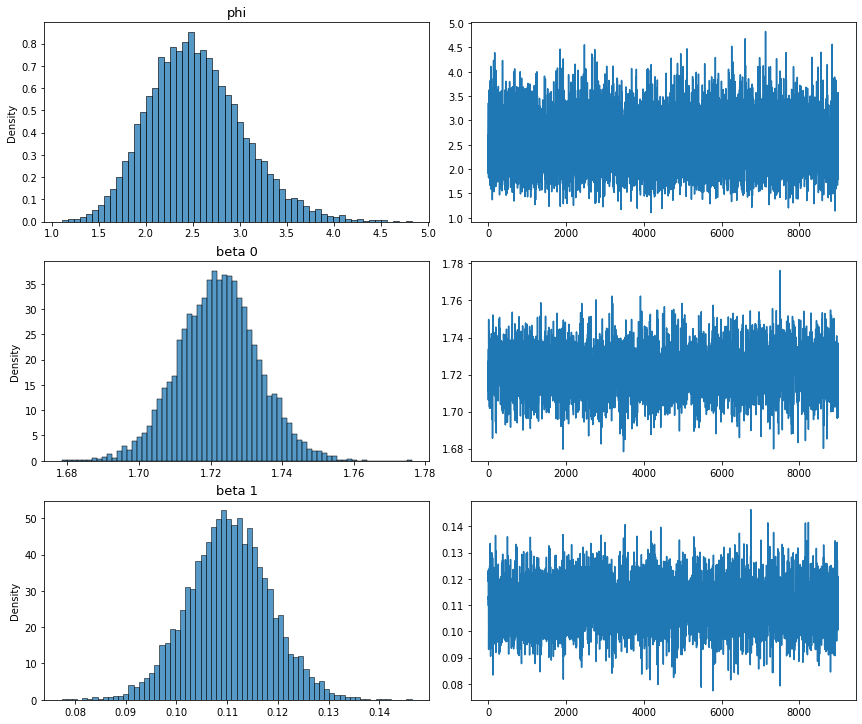

In [ ]:
fig, axes = plt.subplots(3,2,figsize=(12,10))
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)

sns.lineplot(ax = axes[0,1],x = range(len(phi)), y = phi)
axes[0,0].set_title('phi',size = 13)

sns.lineplot(ax = axes[1,1],x = range(len(beta0)), y = beta0)
axes[1,0].set_title('beta 0',size = 13)

sns.lineplot(ax = axes[2,1],x = range(len(beta1)), y = beta1)
axes[2,0].set_title('beta 1',size = 13)

sns.histplot(ax = axes[0,0], x = phi, stat = 'density')

sns.histplot(ax = axes[1,0], x = beta0 , stat = 'density')

sns.histplot(ax = axes[2,0], x = beta1, stat = 'density')


In [ ]:
np.percentile(phi,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])

array([1.64918249, 3.63121949])

In [ ]:
#Resumo Beta 0
dataframe = {"Média" : [round(np.mean(beta0),4)], "Variância" : [round(np.var(beta0),4)] , "Mediana" : statistics.median(beta0), "IC 95 Inf" : [1.70000], "IC 95 Sup": [1.744238]}
beta0_resumos = pd.DataFrame(dataframe)
beta0_resumos

,Média,Variância,Mediana,IC 95 Inf,IC 95 Sup
0,1.7221,0.0001,1.7221,1.7,1.744238


In [ ]:
#Resumo Beta 1
dataframe = {"Média" : [round(np.mean(beta1),4)], "Variância" : [round(np.var(beta1),4)] , "Mediana" : round(statistics.median(beta1),4), "IC 95 Inf" : [0.09444], "IC 95 Sup": [0.12633]}
beta1_resumos = pd.DataFrame(dataframe)
beta1_resumos

,Média,Variância,Mediana,IC 95 Inf,IC 95 Sup
0,0.1103,0.0001,0.1103,0.09444,0.12633


In [ ]:
#Resumo Phi 
dataframe = {"Média" : [round(np.mean(phi),4)], "Variância" : [round(np.var(phi),4)] , "Mediana" : round(statistics.median(phi),4), "IC 95 Inf" : [1.6491], "IC 95 Sup": [3.6312]}
beta1_resumos = pd.DataFrame(dataframe)
beta1_resumos

,Média,Variância,Mediana,IC 95 Inf,IC 95 Sup
0,2.536,0.2536,2.4988,1.6491,3.6312


**Conclusão**

Podemos notar que em todos os métodos utilizados as inferências para $\beta_0$ ficaram muito próximas do valor real, já para $\beta_1$ e $\phi$ os valores de todos métodos ficaram muito próximos entre si, porém um pouco distante do valor real, entretanto temos que levar em consideração que temos um $\epsilon$ somando na nossa regressão linear simples e dessa forma conseguimos resultados muito satisfatórios para os parâmetros. \\

Todos os métodos tiveram resultados muito parecidos, porém no caso dos métodos Bayesianos foi possível obter uma amostra do parâmetro e dessa forma conseguimos tirar mais informações em relação ao parâmetro tais como mediana, variância e alguns quantis.\\

Entre os métodos Bayesianos utilizados o PyMC3 foi um dos mais rápidos para executar e obteve bons resultados, porém precisamos ressaltar que não sabemos exatamente o procedimento que está sendo executado sendo necessário fazer a leitura da documentação. Já com algoritmo do Gibbs Sampling tivemos que calcular a distribuição condicional completa para cada parâmetro, além de programar manualmente a forma que o algoritmo funciona, porém conseguimos resultados muito parecidos com os outros métodos com a vantagem de estar cientes dos processos que está ocorrendo com o algoritmo.